In [ ]:
# cd .. cd .. 
# cd Applications/Tor\ Browser.app/Contents/Resources/TorBrowser/Tor/
# \. tor
import requests
import json
overpass_url = "http://overpass-api.de/api/interpreter"
overpass_query = """
[out:json][timeout:50];
area[name="Санкт-Петербург"];
nwr(area)[tourism = 'museum'];
out;
"""

torport = 9050
proxies = {
    'http': "socks5h://localhost:{}".format(torport),
    'https': "socks5h://localhost:{}".format(torport)
}

response = requests.get(overpass_url, 
                        params={'data': overpass_query}, proxies = proxies)
data = response.json()

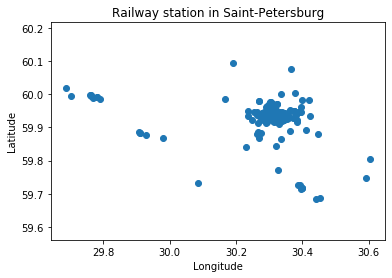

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# Collect coords into list
coords = []
for element in data['elements']:
    if element['type'] == 'node':
        lon = element['lon']
        lat = element['lat']
        coords.append((lon, lat))
    elif 'center' in element:
        lon = element['center']['lon']
        lat = element['center']['lat']
        coords.append((lon, lat))
# Convert coordinates into numpy array
X = np.array(coords)
plt.plot(X[:, 0], X[:, 1], 'o')
plt.title('Railway station in Saint-Petersburg')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.axis('equal')
plt.show()

In [ ]:
from geojson import Point, Feature, FeatureCollection, dump
from geojson import MultiPoint

byFoot = MultiPoint(coords)


features = []
features.append(Feature(geometry = byFoot, properties={"type": "railwayStation"}))

feature_collection = FeatureCollection(features)

with open('railwayStation.geojson', 'w') as f:
    dump(feature_collection, f)

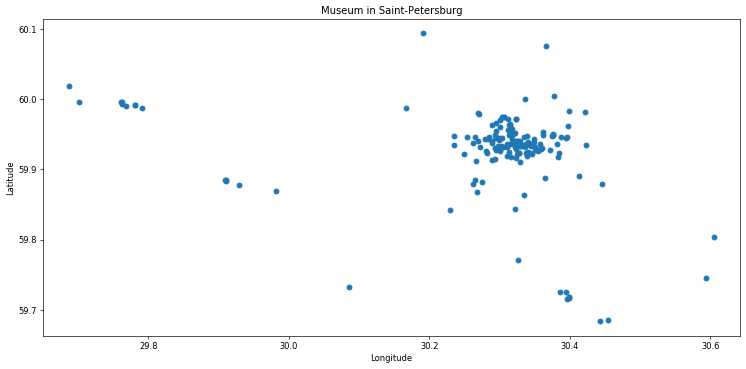

In [ ]:
import requests
import json
overpass_url = "http://overpass-api.de/api/interpreter"
overpass_query = """
[out:json];
area[name='Санкт-Петербург'];
(node['tourism' = 'museum'](area);
way['tourism' = 'museum'](area);
rel['tourism' = 'museum'](area);
);
out;
"""

torport = 9050
proxies = {
    'http': "socks5h://localhost:{}".format(torport),
    'https': "socks5h://localhost:{}".format(torport)
}

response = requests.get(overpass_url, 
                        params={'data': overpass_query}, proxies = proxies)
data = response.json()
import numpy as np
import matplotlib.pyplot as plt
# Collect coords into list
coords = []
for element in data['elements']:
    if element['type'] == 'node':
        lon = element['lon']
        lat = element['lat']
        coords.append((lon, lat))
    elif 'center' in element:
        lon = element['center']['lon']
        lat = element['center']['lat']
        coords.append((lon, lat))
# Convert coordinates into numpy array
museum = np.array(coords)
plt.figure(num=None, figsize=(15, 7), dpi=60)


plt.plot(museum[:, 0], museum[:, 1], 'o')

plt.title('Museum in Saint-Petersburg')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.axis('equal')
plt.show()


In [ ]:
import requests
import json
overpass_url = "http://overpass-api.de/api/interpreter"
overpass_query = """
[out:json];
area[name='Санкт-Петербург'];
way["name"="КАД"];
out geom;
node(w);                 // get all ways' nodes
way[highway](bn);        // find those highway ways, containing previously found nodes
out geom;
"""

torport = 9050
proxies = {
    'http': "socks5h://localhost:{}".format(torport),
    'https': "socks5h://localhost:{}".format(torport)
}

response = requests.get(overpass_url, 
                        params={'data': overpass_query}, proxies = proxies)
data = response.json()



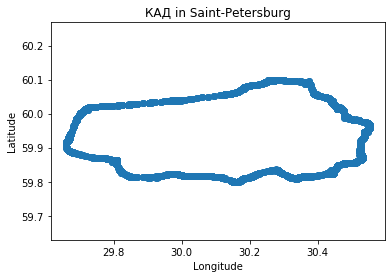

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
coords = []
for element in data['elements']:
    if 'geometry' in element:
        for i in range(len(element['geometry'])):
            lon = element['geometry'][i]['lon']
            lat = element['geometry'][i]['lat']
            coords.append((lon, lat))
# Convert coordinates into numpy array
X = np.array(coords)
plt.plot(X[:, 0], X[:, 1], 'o')
plt.title('КАД in Saint-Petersburg')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.axis('equal')
plt.show()

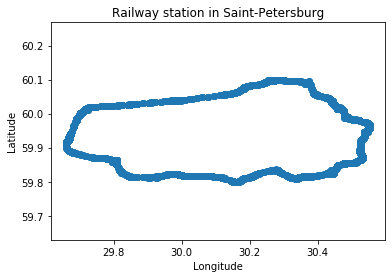

In [ ]:
import requests
import json
overpass_url = "http://overpass-api.de/api/interpreter"
overpass_query = """
[out:json];
area[name='Санкт-Петербург'];
way["highway"];

out geom;
node(w);                 // get all ways' nodes
way[highway](bn);        // find those highway ways, containing previously found nodes
out geom;
"""

torport = 9050
proxies = {
    'http': "socks5h://localhost:{}".format(torport),
    'https': "socks5h://localhost:{}".format(torport)
}

response = requests.get(overpass_url, 
                        params={'data': overpass_query}, proxies = proxies)
data = response.json()

In [ ]:
data

{'version': 0.6,
 'generator': 'Overpass API 0.7.55.1011 6c2efc30',
 'osm3s': {'timestamp_osm_base': '2020-02-11T15:43:02Z',
  'timestamp_areas_base': '2020-02-11T12:15:02Z',
  'copyright': 'The data included in this document is from www.openstreetmap.org. The data is made available under ODbL.'},
 'elements': [],
 'remark': 'runtime error: Query run out of memory using about 2048 MB of RAM.'}

In [ ]:
from pandas.io.json import json_normalize
import requests

url = 'http://overpass-api.de/api/interpreter'  # Overpass API URL
query = """
[out:json];
area['ISO3166-2' = 'RU-SPE'];
way[highway = motorway](area);
out;
"""
torport = 9050
proxies = {
    'http': "socks5h://localhost:{}".format(torport),
    'https': "socks5h://localhost:{}".format(torport)
}

r = requests.get(url, params={'data': query}, proxies = proxies)
data = r.json()  # read response as JSON and get the data

In [ ]:
import requests
import json
overpass_url = "http://overpass-api.de/api/interpreter"
overpass_query = """
[out:json];
area[name="Санкт-Петербург"]->.b;
rel(area.b)[name="Василеостровский район"];
map_to_area -> .a;
way[highway~"^(motorway|trunk|primary|secondary|tertiary|unclassified|living_street|pedestrian|bus_guideway|residential)$"](area.a);
out geom;
relation[highway~"^(motorway|trunk|primary|secondary|tertiary|unclassified|living_street|pedestrian|bus_guideway|residential)$"](area.a);
out geom;
"""

torport = 9050
proxies = {
    'http': "socks5h://localhost:{}".format(torport),
    'https': "socks5h://localhost:{}".format(torport)
}


response = requests.get(overpass_url, 
                        params={'data': overpass_query}, proxies = proxies)
data = response.json()

In [ ]:
data1 = {}
for i in range(len(data['elements'])):
    if 'name' in data['elements'][i]['tags']:
        if data['elements'][i]['tags']['name'] in data1:
            if 'geometry' in data['elements'][i]:
                for j in range(len(data['elements'][i]['geometry'])):
                    data1[data['elements'][i]['tags']['name']].append(data['elements'][i]['geometry'][j])
        else:
            data1[data['elements'][i]['tags']['name']] = data['elements'][i]['geometry']
    else:
        if 'geometry' in data['elements'][i]:
            data1['empty'] = data['elements'][i]['geometry']

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
coords = [[] for x in range(len(data1))]
for i in range(len(data1)):
        for j in range(len(data1[list(data1.keys())[i]])):
            lon = data1[list(data1.keys())[i]][j]['lon']
            lat = data1[list(data1.keys())[i]][j]['lat']
            coords[i].append((lon, lat))
X = np.array(coords[0])
print(X)
name = []
for i in data1:
    name.append(i)

plt.figure(num=None, figsize=(50, 30), dpi=60)

for k in range(len(coords)):
    #coords[k].sort(key=lambda k: (k[0]), reverse=False)
    X = np.array(coords[k])
    lab = name[k]
    plt.plot(X[:, 0], X[:, 1], 'o', label = lab)

plt.title('Васильевский остров')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(loc = 'upper left')
plt.axis('equal')
plt.show()

[[30.2401032 59.926617 ]
 [30.2401576 59.9265709]
 [30.2520332 59.9222448]
 [30.2520932 59.9222312]
 [30.2521753 59.9222127]
 [30.2542123 59.9217526]
 [30.254239  59.9217466]
 [30.2542676 59.9217401]
 [30.2651339 59.92435  ]
 [30.2652552 59.9243562]
 [30.265345  59.924378 ]
 [30.2654008 59.9244068]
 [30.2654347 59.9244423]
 [30.266604  59.9259058]
 [30.2503248 59.9226197]
 [30.2519526 59.9222625]
 [30.2520332 59.9222448]
 [30.2502492 59.9226363]
 [30.2503248 59.9226197]
 [30.2403858 59.9262163]
 [30.2404204 59.926141 ]
 [30.2405349 59.9259188]
 [30.2407063 59.9255664]
 [30.2408871 59.9253627]
 [30.241115  59.9252109]
 [30.2416423 59.9249066]
 [30.2418404 59.9247924]
 [30.2422786 59.924589 ]
 [30.2434461 59.924157 ]
 [30.24399   59.9239626]
 [30.2445535 59.9238442]
 [30.2448311 59.9237863]
 [30.2452487 59.9236999]
 [30.2473056 59.9232747]
 [30.2476107 59.9232104]
 [30.2478811 59.9231546]
 [30.2496646 59.9227642]
 [30.2502492 59.9226363]
 [30.2401576 59.9265709]
 [30.2401802 59.9265361]


<Figure size 3000x1800 with 1 Axes>

No handles with labels found to put in legend.


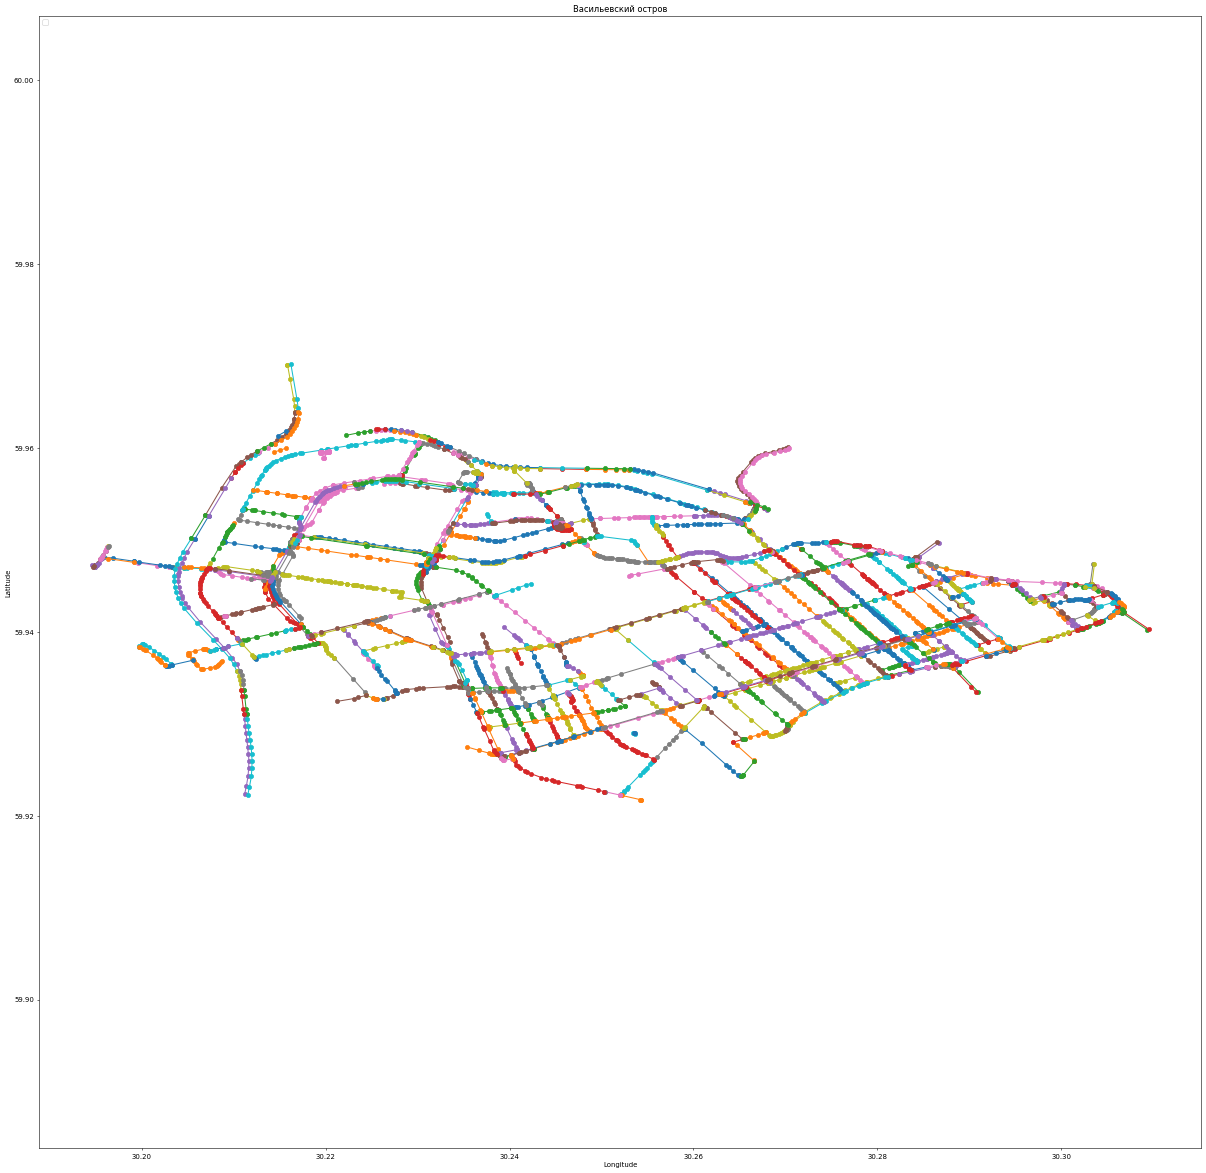

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
coords = [[] for x in range(len(data['elements']))]
for i in range(len(data['elements'])):
    if 'geometry' in data['elements'][i]:
            for j in range(len(data['elements'][i]['geometry'])):
                lon = data['elements'][i]['geometry'][j]['lon']
                lat = data['elements'][i]['geometry'][j]['lat']
                coords[i].append((lon, lat))
X = np.array(coords[0])
plt.figure(num=None, figsize=(30, 30), dpi=50)

for k in range(len(data['elements'])):
    X = np.array(coords[k])
    if 'name' in data['elements'][k]['tags']:
        name = data['elements'][k]['tags']['name']
    else:
        name = 'empty'
    if len(coords[k]) > 0:
        #plt.plot(X[:, 0], X[:, 1], '-o', label = name )
        plt.plot(X[:, 0], X[:, 1], '-o')


plt.title('Васильевский остров')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(loc = 'upper left')
plt.axis('equal')
plt.show()

In [ ]:
b = []
for i in range(len(coords)):
    a = coords[i]
    for v,w in zip(a[:-1], a[1:]):
        b.append([v,w])

In [ ]:
import networkx as nx
G=nx.Graph()


In [ ]:
f = []
for v,w in zip(convertBusesStops[:-1], convertBusesStops[1:]):
    f.append([v,w])

In [ ]:
G = nx.Graph()
G.add_edges_from(b)
G.add_edges_from(f)

In [ ]:
pos = {n: n for n in G.nodes}
print("shortest path")
labels = {n: '({:.2f}, {:.2f})'.format(n[0], n[1]) for n in G.nodes}
nodes = list(G.nodes())
begin_end = [(30.2401576, 59.9265709), (30.2834406, 59.9359681)]
pat = nx.dijkstra_path(G,begin_end[0], begin_end[1])

shortest path


In [ ]:
#nx.draw(G,pos=pos)
#G.add_edges_from(f)

No handles with labels found to put in legend.


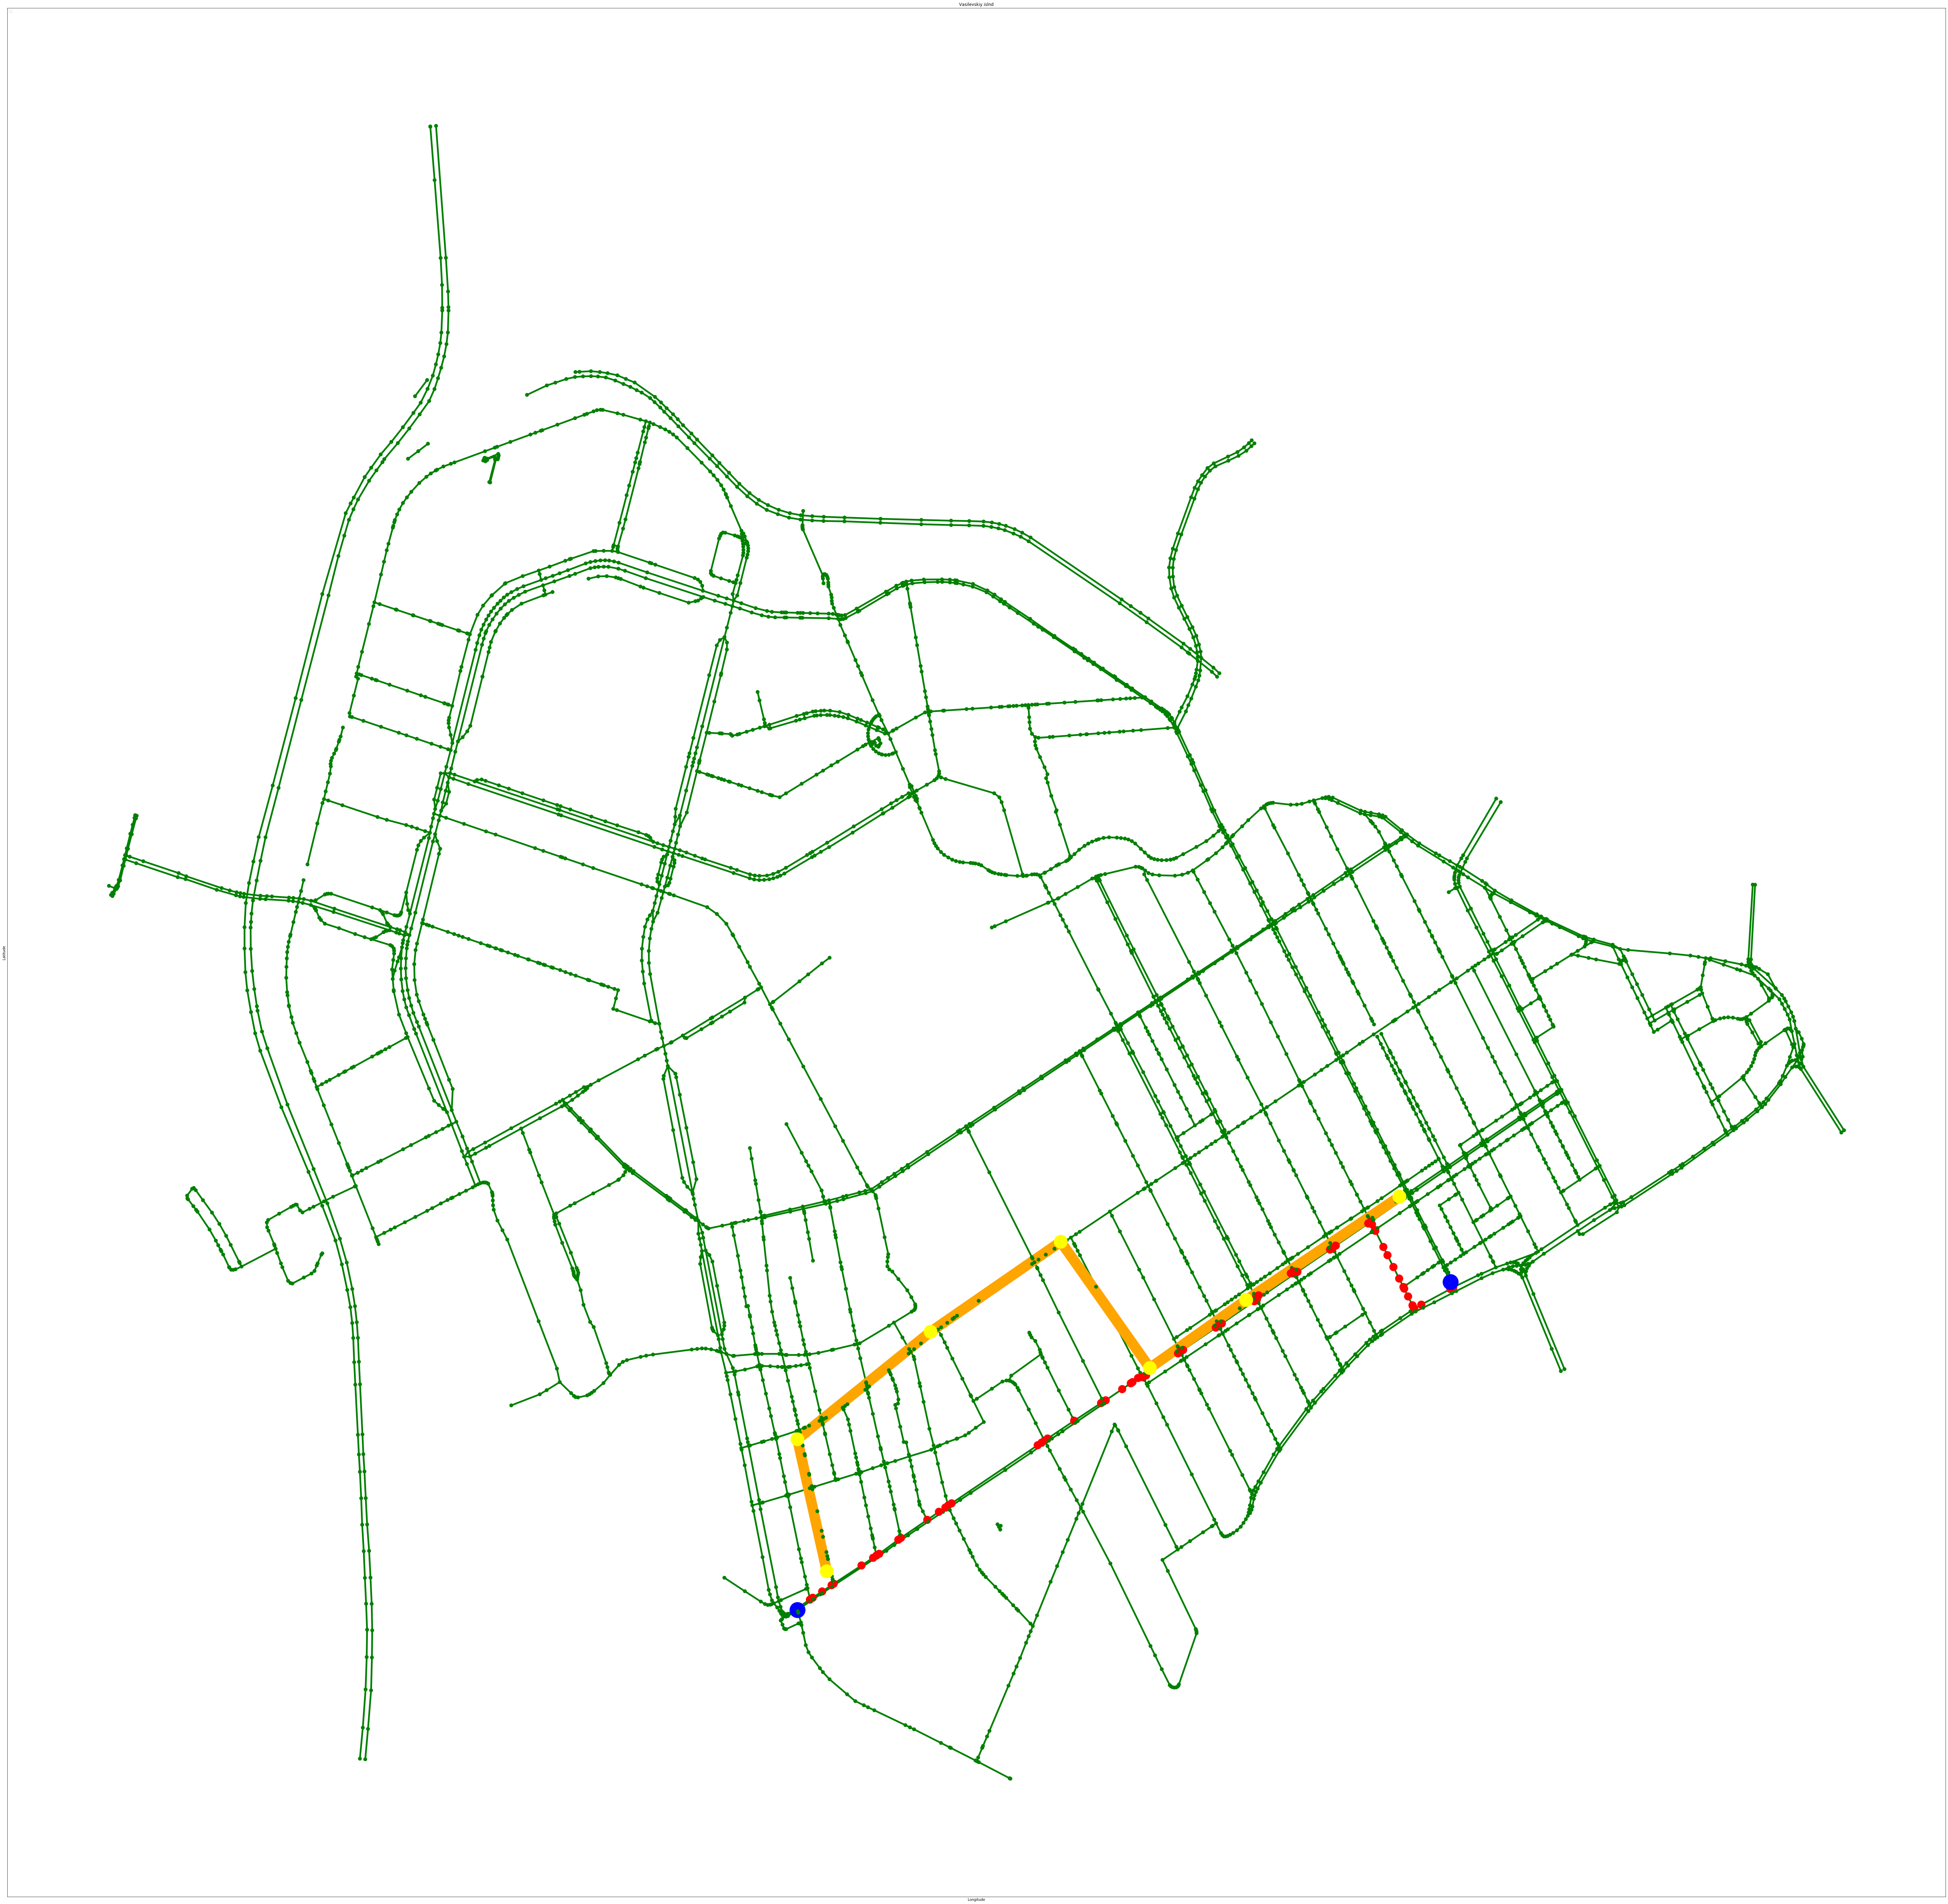

In [ ]:
plt.figure(figsize=(100, 100))
color_map = []
size_map = []
color_edges = []
size_edges = []
width = []
for node in G:
    if node in begin_end:
        color_map.append('blue')
        size_map.append(2000)
    elif node in a:
        color_map.append('red')
        size_map.append(3000)
    elif node in pat :
        color_map.append('red')
        size_map.append(500)
    elif node in convertBusesStops:
        color_map.append('yellow')
        size_map.append(1500)
    else: 
        color_map.append('green')
        size_map.append(100)

for edge in G.edges():
    a = list(map(lambda x: tuple(x), f))
    if edge in a:
        color_edges.append('orange')
        size_edges.append('500')
        width.append('30')
    else:
        color_edges.append('green')
        size_edges.append('100')
        width.append('5')

nx.draw_networkx_edges(G, pos, edge_color = color_edges, edge_size = size_edges, width = width)
#nx.draw_networkx_edges(G, pos)
nx.draw_networkx_nodes(G, pos, node_color = color_map, node_size = size_map, alfa = 0.8)

plt.title('Vasilevskiy islnd')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(loc = 'upper left')
plt.show()

In [ ]:
print("shortest path")
pat = nx.dijkstra_path(G,nodes[1], nodes[-1])

shortest path


In [ ]:
nodes = list(G.nodes())

In [ ]:
begin_end = [nodes[1], nodes[1637]]

In [ ]:
nodes

[(30.2401032, 59.926617),
 (30.2401576, 59.9265709),
 (30.2264561, 59.9416218),
 (30.2260029, 59.9415536),
 (30.2254746, 59.9414141),
 (30.2250748, 59.9413108),
 (30.2246016, 59.9411906),
 (30.236799, 59.9571802),
 (30.2365009, 59.9572684),
 (30.2570865, 59.9468986),
 (30.2572006, 59.9468025),
 (30.2575822, 59.9464811),
 (30.2577396, 59.9463486),
 (30.2579665, 59.9461575),
 (30.25814, 59.9460113),
 (30.2600821, 59.944361),
 (30.2601063, 59.944341),
 (30.2609319, 59.9436599),
 (30.2612422, 59.9433953),
 (30.2612886, 59.9433554),
 (30.2613487, 59.9433039),
 (30.2562878, 59.9339001),
 (30.2563781, 59.9338209),
 (30.2564063, 59.9337963),
 (30.2565559, 59.9336656),
 (30.2567285, 59.9335148),
 (30.2574756, 59.9328619),
 (30.2581216, 59.9323122),
 (30.2584056, 59.9320695),
 (30.2584928, 59.9319959),
 (30.2585559, 59.9319346),
 (30.2494997, 59.9504713),
 (30.2495463, 59.9505338),
 (30.2495412, 59.9506043),
 (30.2493207, 59.9510959),
 (30.2492705, 59.9512079),
 (30.2490989, 59.9516432),
 (30.24

[]

In [ ]:
begin_end = [nodes[1], nodes[-1]]

In [ ]:
begin_end

[(30.2401576, 59.9265709), (30.2834406, 59.9359681)]

array([[30.272139 , 59.9316026],
       [30.3212778, 59.9518506],
       [30.3506548, 59.9273798],
       [30.5933938, 59.7461349],
       [30.3227528, 59.9716153],
       [30.3989809, 59.9830279],
       [30.2355489, 59.9351378],
       [30.3132306, 59.9245876],
       [30.3000979, 59.9265814],
       [29.7613316, 59.9961341],
       [30.326108 , 59.7715872],
       [30.3229412, 59.9711806],
       [30.2796329, 59.9425628],
       [30.4225445, 59.9347001],
       [30.3248528, 59.9213674],
       [30.2944376, 59.9276918],
       [30.3988574, 59.7182624],
       [30.3848158, 59.9227783],
       [30.0863764, 59.73301  ],
       [30.3124463, 59.9713872],
       [30.3780033, 60.0048425],
       [30.3550802, 59.9264951],
       [30.3014607, 59.9318133],
       [30.2821374, 59.9235257],
       [29.7629948, 59.9935152],
       [29.7686816, 59.989472 ],
       [30.3109454, 59.9189815],
       [30.3142041, 59.9534635],
       [30.3047879, 59.9318003],
       [30.3135921, 59.9486788],
       [30

In [ ]:
a = tuple(museum[0])

In [ ]:
G.add_node(a)

In [ ]:
pos = {n: n for n in G.nodes}

In [ ]:
G.nodes()

NodeView(((30.2401032, 59.926617), (30.2401576, 59.9265709), (30.2257955, 59.9414791), (30.2254759, 59.941398), (30.2251487, 59.9413211), (30.2245533, 59.9411785), (30.236799, 59.9571802), (30.2365009, 59.9572684), (30.2570865, 59.9468986), (30.2572006, 59.9468025), (30.2575822, 59.9464811), (30.2577396, 59.9463486), (30.2579665, 59.9461575), (30.25814, 59.9460113), (30.2600821, 59.944361), (30.2601063, 59.944341), (30.2609319, 59.9436599), (30.2612422, 59.9433953), (30.2613487, 59.9433039), (30.2562878, 59.9339001), (30.2563781, 59.9338209), (30.2564063, 59.9337963), (30.2565559, 59.9336656), (30.2567285, 59.9335148), (30.2574756, 59.9328619), (30.2581216, 59.9323122), (30.2584056, 59.9320695), (30.2584928, 59.9319959), (30.2585559, 59.9319346), (30.2495654, 59.9504599), (30.2495423, 59.9505184), (30.2492705, 59.9512079), (30.2490989, 59.9516432), (30.2490309, 59.9518155), (30.248947, 59.9520283), (30.2488767, 59.9522067), (30.2488342, 59.9523144), (30.2530331, 59.946128), (30.2532268

In [ ]:
a = [a]

In [ ]:
begin_end

[(30.2401576, 59.9265709), (30.2834406, 59.9359681)]

In [ ]:
a

[]

In [ ]:
coords

[(30.272139, 59.9316026),
 (30.3212778, 59.9518506),
 (30.3506548, 59.9273798),
 (30.5933938, 59.7461349),
 (30.3227528, 59.9716153),
 (30.3989809, 59.9830279),
 (30.2355489, 59.9351378),
 (30.3132306, 59.9245876),
 (30.3000979, 59.9265814),
 (29.7613316, 59.9961341),
 (30.326108, 59.7715872),
 (30.3229412, 59.9711806),
 (30.2796329, 59.9425628),
 (30.4225445, 59.9347001),
 (30.3248528, 59.9213674),
 (30.2944376, 59.9276918),
 (30.3988574, 59.7182624),
 (30.3848158, 59.9227783),
 (30.0863764, 59.73301),
 (30.3124463, 59.9713872),
 (30.3780033, 60.0048425),
 (30.3550802, 59.9264951),
 (30.3014607, 59.9318133),
 (30.2821374, 59.9235257),
 (29.7629948, 59.9935152),
 (29.7686816, 59.989472),
 (30.3109454, 59.9189815),
 (30.3142041, 59.9534635),
 (30.3047879, 59.9318003),
 (30.3135921, 59.9486788),
 (30.304047, 59.9441061),
 (30.3221755, 59.8431606),
 (30.337377, 59.9358282),
 (30.2944675, 59.9551963),
 (30.2351057, 59.9481657),
 (30.2954297, 59.9442137),
 (30.3951915, 59.7149639),
 (30.190

In [ ]:
 import pandas as df

In [ ]:
a = df.DataFrame(coords)

In [ ]:
BBox = (a[0].min(),   a[0].max(),      
         a[1].min(), a[1].max())

In [ ]:
a[0].min()

29.6872526

In [ ]:
a

,0,1
0,30.272139,59.931603
1,30.321278,59.951851
2,30.350655,59.927380
3,30.593394,59.746135
4,30.322753,59.971615
...,...,...
164,30.393958,59.725243
165,30.312645,59.963718
166,30.289621,59.962748
167,30.253426,59.946064


(29.6872526, 30.6048324, 59.6836516, 60.0938161)

In [ ]:
a

,0,1
0,30.272139,59.931603
1,30.321278,59.951851
2,30.350655,59.927380
3,30.593394,59.746135
4,30.322753,59.971615
...,...,...
164,30.393958,59.725243
165,30.312645,59.963718
166,30.289621,59.962748
167,30.253426,59.946064


In [ ]:
coosdinatesStopsBuses = ['59.9384143161821,30.2800484',
 '59.9354546290171,30.2698898',
 '59.933507592511,30.2635059',
 '59.9371244040759,30.2576046',
 '59.9345444293413,30.2489758',
 '59.9314646211391,30.2401505',
 '59.9276829099663,30.2420998']

In [ ]:
coosdinatesStopsBuses

['59.9384143161821,30.2800484',
 '59.9354546290171,30.2698898',
 '59.933507592511,30.2635059',
 '59.9371244040759,30.2576046',
 '59.9345444293413,30.2489758',
 '59.9314646211391,30.2401505',
 '59.9276829099663,30.2420998']

In [ ]:
begin_end

[(30.2401576, 59.9265709), (30.2834406, 59.9359681)]

In [ ]:
tuple([coosdinatesStopsBuses[0]])

('59.9384143161821,30.2800484',)

In [ ]:
literal_eval(coosdinatesStopsBuses[0])

(59.9384143161821, 30.2800484)

In [ ]:
def convertForMap(coosdinatesStopsBuses):
    convert = list(map(lambda x: literal_eval(x), coosdinatesStopsBuses))
    convert = [(t[1], t[0]) for t in convert]
    return convert

In [ ]:
convertForMap(coosdinatesStopsBuses)

[(30.2800484, 59.9384143161821),
 (30.2698898, 59.9354546290171),
 (30.2635059, 59.933507592511),
 (30.2576046, 59.9371244040759),
 (30.2489758, 59.9345444293413),
 (30.2401505, 59.9314646211391),
 (30.2420998, 59.9276829099663)]

In [ ]:
convertBusesStops = convertForMap(coosdinatesStopsBuses)

In [ ]:
convertBusesStops

[(30.2800484, 59.9384143161821),
 (30.2698898, 59.9354546290171),
 (30.2635059, 59.933507592511),
 (30.2576046, 59.9371244040759),
 (30.2489758, 59.9345444293413),
 (30.2401505, 59.9314646211391),
 (30.2420998, 59.9276829099663)]

In [ ]:
pat

[(30.2401576, 59.9265709),
 (30.2401032, 59.926617),
 (30.2409805, 59.9268717),
 (30.2411647, 59.9269248),
 (30.2417924, 59.9271045),
 (30.2424157, 59.9272847),
 (30.2425582, 59.9273277),
 (30.2443986, 59.9278495),
 (30.2451696, 59.928069),
 (30.2453843, 59.9281321),
 (30.2455692, 59.9281823),
 (30.2468372, 59.9285864),
 (30.2470122, 59.9286401),
 (30.2487557, 59.9291569),
 (30.2495295, 59.9293874),
 (30.2499573, 59.9295097),
 (30.2501436, 59.9295699),
 (30.2503702, 59.9296299),
 (30.2560748, 59.9312943),
 (30.256332, 59.9313679),
 (30.2565333, 59.931427),
 (30.2567345, 59.9314862),
 (30.2584928, 59.9319959),
 (30.2602767, 59.9325032),
 (30.2604236, 59.9325444),
 (30.260582, 59.9325809),
 (30.2616753, 59.9329021),
 (30.2622458, 59.9330697),
 (30.2623543, 59.9331018),
 (30.2627257, 59.9332209),
 (30.262944, 59.9332441),
 (30.2630235, 59.9332547),
 (30.2630812, 59.9332612),
 (30.2632597, 59.9332938),
 (30.2653737, 59.9339253),
 (30.2655245, 59.9339709),
 (30.2657125, 59.9340253),
 (30.26

In [ ]:
b

[[(30.2401032, 59.926617), (30.2401576, 59.9265709)],
 [(30.2264561, 59.9416218), (30.2260029, 59.9415536)],
 [(30.2260029, 59.9415536), (30.2254746, 59.9414141)],
 [(30.2254746, 59.9414141), (30.2250748, 59.9413108)],
 [(30.2250748, 59.9413108), (30.2246016, 59.9411906)],
 [(30.236799, 59.9571802), (30.2365009, 59.9572684)],
 [(30.2570865, 59.9468986), (30.2572006, 59.9468025)],
 [(30.2572006, 59.9468025), (30.2575822, 59.9464811)],
 [(30.2575822, 59.9464811), (30.2577396, 59.9463486)],
 [(30.2577396, 59.9463486), (30.2579665, 59.9461575)],
 [(30.2579665, 59.9461575), (30.25814, 59.9460113)],
 [(30.25814, 59.9460113), (30.2600821, 59.944361)],
 [(30.2600821, 59.944361), (30.2601063, 59.944341)],
 [(30.2601063, 59.944341), (30.2609319, 59.9436599)],
 [(30.2609319, 59.9436599), (30.2612422, 59.9433953)],
 [(30.2612422, 59.9433953), (30.2612886, 59.9433554)],
 [(30.2612886, 59.9433554), (30.2613487, 59.9433039)],
 [(30.2562878, 59.9339001), (30.2563781, 59.9338209)],
 [(30.2563781, 59.93

In [ ]:
f = []
for v,w in zip(convertBusesStops[:-1], convertBusesStops[1:]):
    f.append([v,w])

In [ ]:
convertBusesStops[0]

(30.2800484, 59.9384143161821)

In [ ]:
f

[[(30.2800484, 59.9384143161821), (30.2698898, 59.9354546290171)],
 [(30.2698898, 59.9354546290171), (30.2635059, 59.933507592511)],
 [(30.2635059, 59.933507592511), (30.2576046, 59.9371244040759)],
 [(30.2576046, 59.9371244040759), (30.2489758, 59.9345444293413)],
 [(30.2489758, 59.9345444293413), (30.2401505, 59.9314646211391)],
 [(30.2401505, 59.9314646211391), (30.2420998, 59.9276829099663)]]

In [ ]:
b[0]

[(30.2401032, 59.926617), (30.2401576, 59.9265709)]

In [ ]:
a

[]

In [ ]:
f[0]

[(30.2800484, 59.9384143161821), (30.2698898, 59.9354546290171)]

In [ ]:
G.edges()

EdgeView([((30.2401032, 59.926617), (30.2401576, 59.9265709)), ((30.2401032, 59.926617), (30.2395269, 59.9264663)), ((30.2401032, 59.926617), (30.2409805, 59.9268717)), ((30.2401576, 59.9265709), (30.2395242, 59.9263995)), ((30.2401576, 59.9265709), (30.2409981, 59.9268215)), ((30.2401576, 59.9265709), (30.2401802, 59.9265361)), ((30.2264561, 59.9416218), (30.2260029, 59.9415536)), ((30.2264561, 59.9416218), (30.2269832, 59.9417493)), ((30.2264561, 59.9416218), (30.2262182, 59.9415219)), ((30.2260029, 59.9415536), (30.2254746, 59.9414141)), ((30.2254746, 59.9414141), (30.2250748, 59.9413108)), ((30.2250748, 59.9413108), (30.2246016, 59.9411906)), ((30.2246016, 59.9411906), (30.2247063, 59.9410446)), ((30.2246016, 59.9411906), (30.2248325, 59.9410794)), ((30.2246016, 59.9411906), (30.2244041, 59.9411407)), ((30.236799, 59.9571802), (30.2365009, 59.9572684)), ((30.236799, 59.9571802), (30.2366594, 59.9573349)), ((30.236799, 59.9571802), (30.2368308, 59.9571423)), ((30.2365009, 59.9572684

((30.2800484, 59.9384143161821), (30.2698898, 59.9354546290171))

In [ ]:
for edge in G.edges():
    f = list(map(lambda x: tuple(x), f))
    if edge in f:
        print('nastya is very beautiful')

nastya is very beautiful
nastya is very beautiful
nastya is very beautiful
nastya is very beautiful
nastya is very beautiful
nastya is very beautiful


In [ ]:
list(map(lambda x: tuple(x), f))

[((30.2800484, 59.9384143161821), (30.2698898, 59.9354546290171)),
 ((30.2698898, 59.9354546290171), (30.2635059, 59.933507592511)),
 ((30.2635059, 59.933507592511), (30.2576046, 59.9371244040759)),
 ((30.2576046, 59.9371244040759), (30.2489758, 59.9345444293413)),
 ((30.2489758, 59.9345444293413), (30.2401505, 59.9314646211391)),
 ((30.2401505, 59.9314646211391), (30.2420998, 59.9276829099663))]

In [ ]:
col